In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, multivariate_normal
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Creamos los objetos dada una media (mean) y una covarianza (cov)
N1 = multivariate_normal(mean=[1.5,1.5], cov=0.2)
N2 = multivariate_normal(mean=[0,0], cov=0.2)
N3 = multivariate_normal(mean=[1.5,0], cov=0.2)

# Muestreamos una cantidad de puntos aleatorios por gaussiana. Entre 50 y 100 puntos.
n = np.random.randint(50,101, size=3)
d1 = N1.rvs(size=n[0])
d2 = N2.rvs(size=n[1])
d3 = N3.rvs(size=n[2])
print(n)

[97 80 90]


In [3]:
data = np.vstack([d1,d2,d3])
label = np.hstack([0*np.ones(d1.shape[0]),1*np.ones(d2.shape[0]),2*np.ones(d3.shape[0])])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, label, stratify=label, test_size=0.2)

In [5]:
# Creamos el clasificador
tree = DecisionTreeClassifier(max_depth=2)
# Lo ajustamos a los datos
tree.fit(X_train, y_train)
# Obtenemos una predicción para los datos de test.
y_pred = tree.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        20
         1.0       0.94      0.94      0.94        16
         2.0       0.81      0.94      0.87        18

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.92      0.91      0.91        54



In [7]:
## Validación Cruzada definimos la cantidad de folds=3
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Creamos el contenedor de nuestra predicción
y_pred = np.zeros(label.shape[0])
# En el for se itera n_splits veces.
for train_index, test_index in kfold.split(data, label):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # Creamos el clasificador
    tree = DecisionTreeClassifier(max_depth=2)
    # Lo ajustamos a los datos
    tree.fit(X_train, y_train)
    # Obtenemos una predicción para los datos de test dados por test_index
    y_pred[test_index] = tree.predict(X_test)

In [8]:
# Mostramos la matriz de confusión
confusion_matrix(label, y_pred)

array([[89,  0,  8],
       [ 2, 75,  3],
       [ 6,  2, 82]])

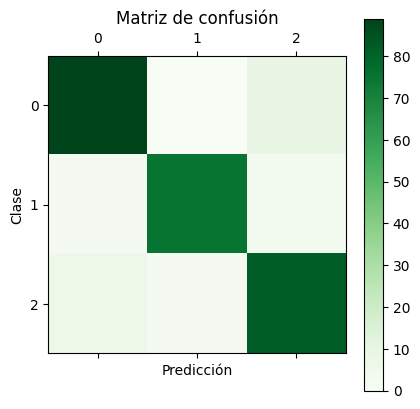

In [9]:
# Ahora de forma gráfica
def plot_confusion_matrix(df_confusion, title='Matriz de confusión', cmap=plt.cm.Greens):
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Clase')
    plt.xlabel('Predicción')

plot_confusion_matrix(confusion_matrix(label, y_pred))